In [1]:
import pandas as pd

In [2]:
# Load dataset
df = pd.read_csv("train.csv", delimiter=',')

# Shuffle dataset

# Drop Ticket Column
df.drop("Ticket", axis=1, inplace=True)

# Pop Passenger ID and Name
info_df = df[["PassengerId", "Name"]]
df.drop(["PassengerId", "Name"], axis=1, inplace=True)

# Drop Cabin columns, temporary
df.drop("Cabin", axis=1, inplace=True)

df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [3]:
# Pre Processing
# Map sex to binary
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# Map Embarked
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
5,0,3,0,NaN,0,0,8.4583,2.0
6,0,1,0,54.0,0,0,51.8625,0.0
7,0,3,0,2.0,3,1,21.0750,0.0
8,1,3,1,27.0,0,2,11.1333,0.0
9,1,2,1,14.0,1,0,30.0708,1.0


In [4]:
# Check NaN per column
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [5]:
# Pre-training processing
x_train, y_train = df.iloc[:, 1:], df.iloc[:, 0]

x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0.0
887,1,1,19.0,0,0,30.0000,0.0
888,3,1,NaN,1,2,23.4500,0.0
889,1,0,26.0,0,0,30.0000,1.0


In [6]:
from classification.decision_tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier(x_train.values, y_train.values, feature_names=list(x_train.columns), class_names={1: "survived", 0: "dead"})

# Train
dt.train(max_depth=1)

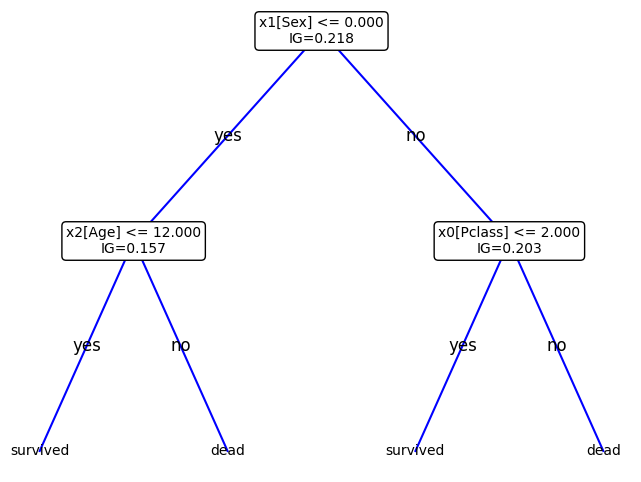

In [7]:
# Print Decision Tree
dt.plot_tree()